In [1]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Plot imports
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from sklearn import linear_model

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X = iris.data
Y = iris.target

In [12]:
iris_data = pd.DataFrame(X,columns=['Sepal Lenght','Sepal Width','Petal Lenght','Petal Width'])
iris_target = pd.DataFrame(Y,columns=['Species'])

In [13]:
iris_data.head()

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Verginica'

In [16]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [17]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [18]:
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


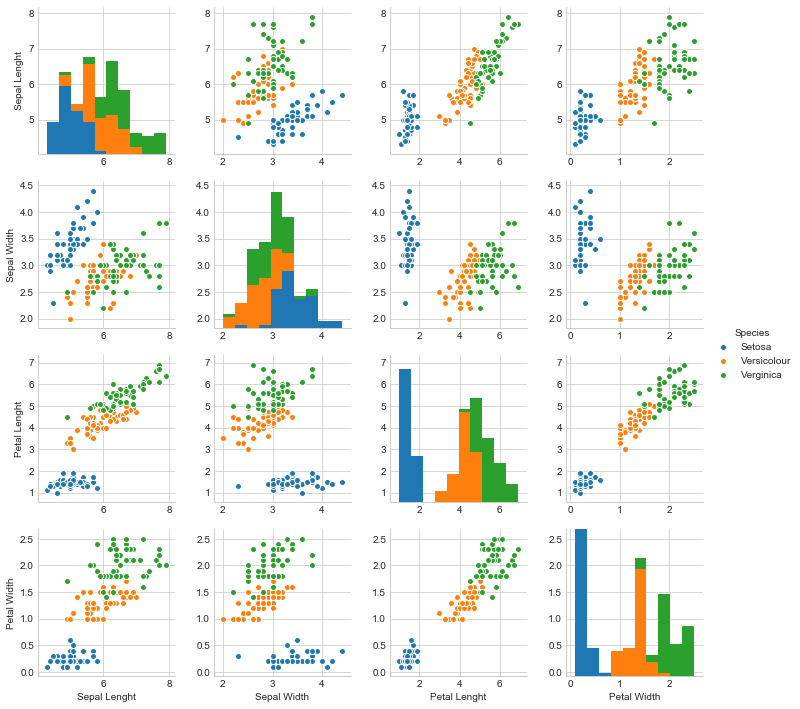

In [19]:
sns.pairplot(iris,hue='Species',)

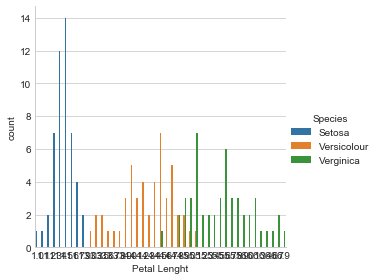

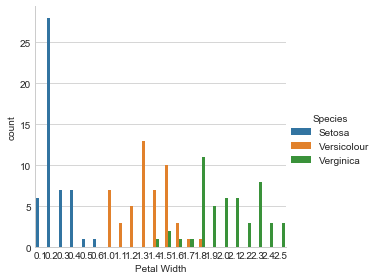

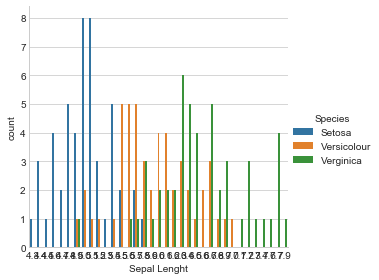

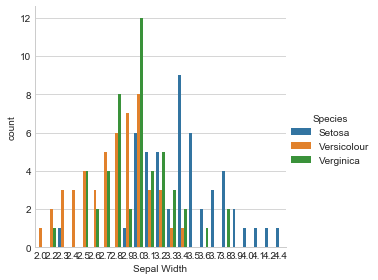

In [29]:
xaxis = ['Petal Lenght','Petal Width','Sepal Lenght','Sepal Width']
for x in xaxis:
    sns.factorplot(x=x,data=iris,hue='Species',kind='count',size=4)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
# create model
logreg = LogisticRegression()

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=5)

In [69]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
Y_pred = logreg.predict(X_test)

In [71]:
from sklearn import metrics

In [72]:
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
k_range = range(1,21)
accuracy = []
for n in k_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))
    

Text(0.5,1,u'K value vs Accuracy')

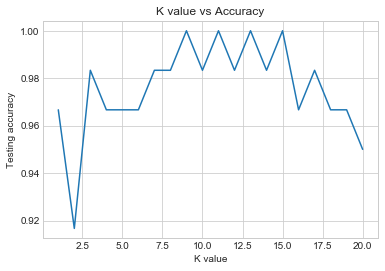

In [109]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')
plt.title('K value vs Accuracy')